In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from fuzzywuzzy import fuzz
from tqdm import tqdm

warnings.filterwarnings("ignore")
%matplotlib inline

In [19]:
df = pd.read_csv('D:/Causal ML/project/transfers-master/data/transfers1.5.csv')
df.head()

,Unnamed: 0,ID,to_club_name,to_league_name,player_name,age,position,from_club_involved_name,fee,transfer_movement,fee_cleaned,year,season,grouping_positions_1,grouping_positions_2,normalized_from_club_name,from_league,to_club_tier,from_club_tier
0,0,3813,Hertha BSC,1 Bundesliga,Lukas Klünter,22,Right Back,1. FC Köln,£1.80m,in,1.80,2018,2018/2019,RB,B,1. FC Köln,1 Bundesliga,Tier_3,Tier_3
1,1,4461,Dinamo Moscow,Premier Liga,Konstantin Rausch,27,Left Back,1. FC Köln,£1.35m,in,1.35,2017,2017/2018,LB,B,1. FC Köln,1 Bundesliga,Tier_2,Tier_3
2,2,4597,Fulham FC,Premier League,Sascha Riether,30,Right Back,1. FC Köln,£1.26m,in,1.26,2013,2013/2014,RB,B,1. FC Köln,1 Bundesliga,Tier_2,Tier_3
3,3,1819,Tottenham Hotspur,Premier League,Kevin Wimmer,22,Centre Back,1. FC Köln,£5.40m,in,5.40,2015,2015/2016,CB,D,1. FC Köln,1 Bundesliga,Tier_1,Tier_3
4,4,3018,TSG 1899 Hoffenheim,1 Bundesliga,Kevin Vogt,24,Centre Back,1. FC Köln,£2.70m,in,2.70,2016,2016/2017,CB,D,1. FC Köln,1 Bundesliga,Tier_2,Tier_3


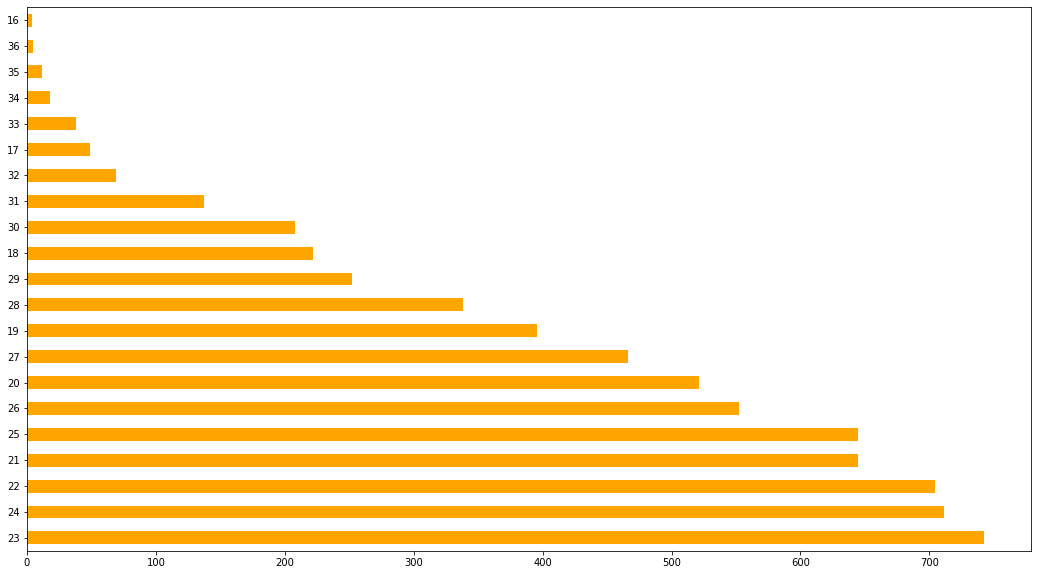

In [20]:
fig, ax = plt.subplots(figsize=(18,10))
df.age.value_counts().plot(kind = "barh", color = 'orange')

#####  The above graph shows there is high frequency of transfers for the ages 20-26

We are going to apply two kind of groupings for AGE

Grouping 1:

- U21: 16-21
- U25: 21-25
- U30: 25-30
- A30: 30+

Grouping 2:

- Under23: 16-23
- Under30: 23-30
- Above30: 30+


#### Grouping 1

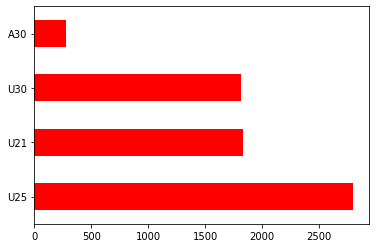

In [23]:
df['age_grouping_1'] = 0

for i in range(len(df)):
    if(df.age[i] <= 21):
        df['age_grouping_1'][i] = 'U21'
        
    elif((21 < df.age[i]) and (25 >= df.age[i])):
        df['age_grouping_1'][i] = 'U25'
        
    elif((25 < df.age[i]) and (30 >= df.age[i])):
        df["age_grouping_1"][i] = 'U30'
        
    else:
        df["age_grouping_1"][i] = 'A30'

df['age_grouping_1'].value_counts().plot(kind = "barh", color = 'red')      

#### Grouping 2

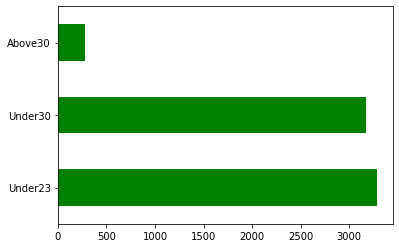

In [24]:
df['age_grouping_2'] = 0

for i in range(len(df)):
    if(df.age[i] <= 23):
        df['age_grouping_2'][i] = 'Under23'      
    elif((23 < df.age[i]) and (30 >= df.age[i])):
        df["age_grouping_2"][i] = 'Under30'        
    else:
        df["age_grouping_2"][i] = 'Above30'

df['age_grouping_2'].value_counts().plot(kind = "barh", color = 'green')      

In [25]:
df

,Unnamed: 0,ID,to_club_name,to_league_name,player_name,age,position,from_club_involved_name,fee,transfer_movement,...,year,season,grouping_positions_1,grouping_positions_2,normalized_from_club_name,from_league,to_club_tier,from_club_tier,age_grouping_1,age_grouping_2
0,0,3813,Hertha BSC,1 Bundesliga,Lukas Klünter,22,Right Back,1. FC Köln,£1.80m,in,...,2018,2018/2019,RB,B,1. FC Köln,1 Bundesliga,Tier_3,Tier_3,U25,Under23
1,1,4461,Dinamo Moscow,Premier Liga,Konstantin Rausch,27,Left Back,1. FC Köln,£1.35m,in,...,2017,2017/2018,LB,B,1. FC Köln,1 Bundesliga,Tier_2,Tier_3,U30,Under30
2,2,4597,Fulham FC,Premier League,Sascha Riether,30,Right Back,1. FC Köln,£1.26m,in,...,2013,2013/2014,RB,B,1. FC Köln,1 Bundesliga,Tier_2,Tier_3,U30,Under30
3,3,1819,Tottenham Hotspur,Premier League,Kevin Wimmer,22,Centre Back,1. FC Köln,£5.40m,in,...,2015,2015/2016,CB,D,1. FC Köln,1 Bundesliga,Tier_1,Tier_3,U25,Under23
4,4,3018,TSG 1899 Hoffenheim,1 Bundesliga,Kevin Vogt,24,Centre Back,1. FC Köln,£2.70m,in,...,2016,2016/2017,CB,D,1. FC Köln,1 Bundesliga,Tier_2,Tier_3,U25,Under30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6729,6729,5809,Mordovia Saransk,Premier Liga,Milan Perendija,27,Centre Back,Otelul Galati,£450k,in,...,2012,2012/2013,CB,D,Otelul Galati,Other,Tier_4,Tier_4,U30,Under30
6730,6730,6506,Académica Coimbra,Liga Nos,Rafa Lopes,22,Centre Forward,Penafiel,£135k,in,...,2013,2013/2014,CF,F,Penafiel,Other,Tier_4,Tier_4,U25,Under23
6731,6731,6578,NAC Breda,Eredivisie,Karol Mets,24,Centre Back,Viking FK,£90k,in,...,2017,2017/2018,CB,D,Viking FK,Other,Tier_4,Tier_4,U25,Under30
6732,6732,6683,Leixões SC,Liga Nos,Cauê,20,Defensive Midfield,Santo André,£45k,in,...,2009,2009/2010,CDM,M,Santo André,Other,Tier_4,Tier_4,U21,Under23


In [26]:
df = df.drop(columns = ['fee','transfer_movement','season'])

In [27]:
df.to_csv('../transfers1.6.csv')